# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [4]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "./data/train.p"
testing_file = "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("Train, test data loaded")

Train, test data loaded


In [6]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


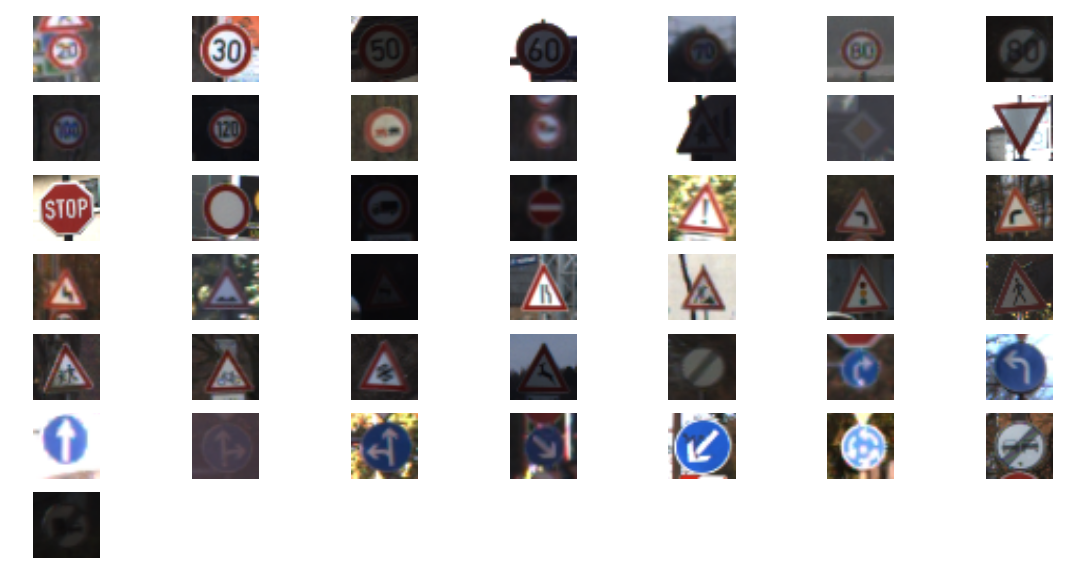

In [7]:
import numpy as np
#import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (14, 7)

def find_label(label):
    choice = 0
    while y_train[choice] != label:
        choice = random.randint(0,n_train-1)
    return choice

def show_7x7():
    for i in range(0,n_classes):
        i0 = find_label(i)
        plt.subplot(7,7,i+1)
        plt.imshow(X_train[i0])
        plt.axis('off')
        
show_7x7()

# A special thanks to @Shmuelnaaman's code snippet on GitHub for showcasing
# images and the label histogram.

### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

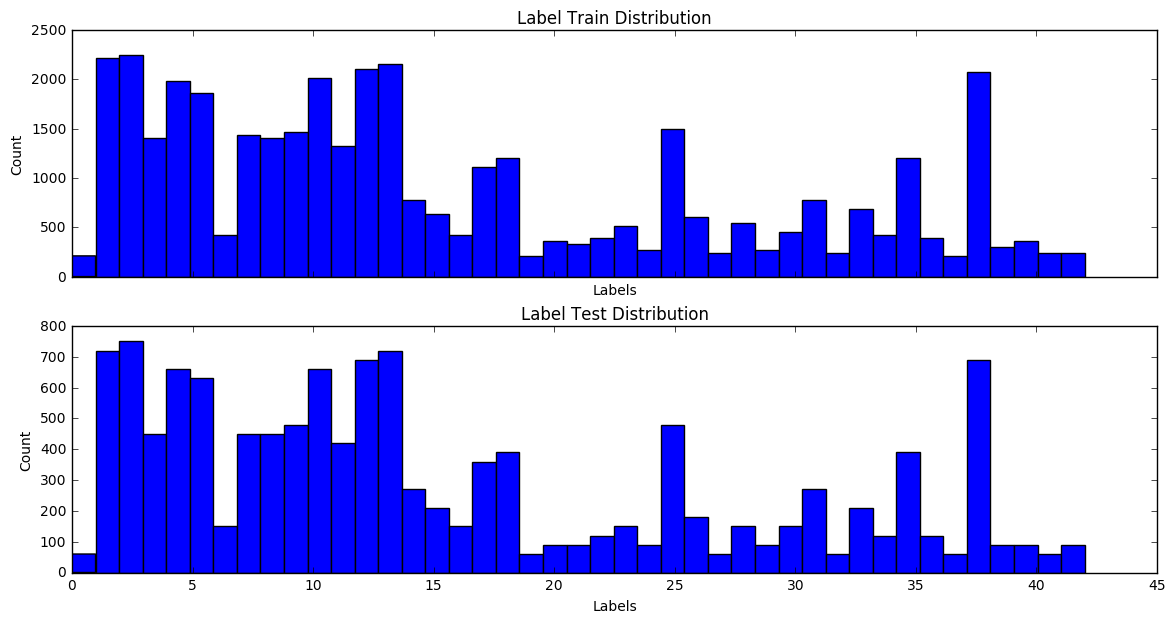

In [8]:

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].hist(y_train,bins=n_classes)
axarr[0].set_title('Label Train Distribution')
axarr[0].set_xlabel('Labels')
axarr[0].set_ylabel('Count')
axarr[1].hist(y_test,bins=n_classes)
axarr[1].set_title('Label Test Distribution')
axarr[1].set_xlabel('Labels')
axarr[1].set_ylabel('Count')

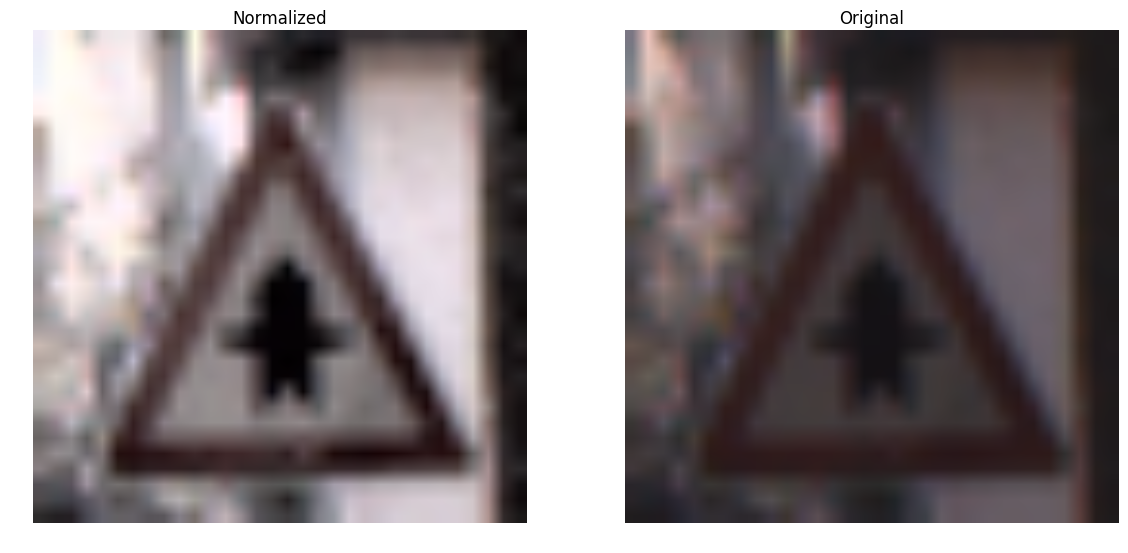

In [9]:
import random 

def clarify_image(image):
    # Normalize the intensity histogram to make the image "pop"
    img2 = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
    img2[:,:,0] = cv2.equalizeHist(img2[:, :, 0])
    bgr = cv2.cvtColor(img2, cv2.COLOR_YCR_CB2BGR)
    return bgr

def show_sample_clarified_image():
    n = random.randint(0, n_train)
    image = X_train[n] 
    bgr = clarify_image(image)

    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(bgr)
    plt.title("Normalized")
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(image)
    plt.title("Original")
    
show_sample_clarified_image()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

def normalize_image(image):
    img = np.array(image, dtype=float32)
    for channel in range(0,3):
        lo = np.min(img[:,:,channel])*1.0
        hi = np.max(img[:,:,channel])*1.0
        img[:,:,channel] = (img[:,:,channel]-lo)/(hi-lo)
    return img-0.5

def prep_images():
    xtrain = np.array(X_train, dtype=np.float32)
    xtest = np.array(X_test, dtype=np.float32)
    for i in range(0,n_train):
        xtrain[i] = normalize_image(clarify_image(X_train[i]))
    for i in range(0,n_test):
        xtest[i] = normalize_image(clarify_image(X_test[i]))
    return xtrain, xtest
        
print("Preparing images...")
xtrain, xtest = prep_images()
print("Images clarified and normalized")

Preparing images...
Images clarified and normalized


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

We apply histogram equalization to the image, clarifying dark and fuzzy images.  The technique equalizes
the contrast and makes otherwise unreadable images somewhat legible.  See https://en.wikipedia.org/wiki/Histogram_equalization

After this, we turn the RGB values of an image into floating point numbers in the range [-0.5,0.5].  This gives
us a mean closer to 0 which better frames a numerical optimization problem. Gradient descent likes to keep 
closer to the origin to prevent falling off cliffs and to more gracefully walk the n-dimensional surface.  

Think of it this way.  We're trying to find a minimum.  Imagine you're playing a game of pool, where the goal
is to push the a single pool ball into a pocket, the minimum.  With a mean near zero, we are right on top of
the ball and can nudge it right and left with direct manipulation.  With a mean much farther from zero, we essentially have a long, precarious pole that is sensitive to the slightest motion of our hands.



In [11]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

x1 = np.append(xtrain, xtest, axis=0)
y1 = np.append(y_train, y_test, axis=0)
xtrain_1, xtest_1, ytrain_1, ytest_1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

print("%d to train, %d to test" % (xtrain_1.shape[0], xtest_1.shape[0]))

41471 to train, 10368 to test


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

I joined the original test and train sets, scrambled them, then chose a random 80% for training.  The 
remaining 20% were left for testing.  I did not generate additional data.  The original research
talks of generating images that are randomly scaled and offset.

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

def conv2d(x,
           output_dim,
           kernel_size,
           stride,
           name='conv2d'):
  # A handy routine for creating a 2d convolution layer
  # with RELU activation
  with tf.variable_scope(name):
      stride = [1, stride[0], stride[1], 1]
      kernel_shape = [kernel_size[0], kernel_size[1], x.get_shape()[-1], output_dim]
      w = tf.get_variable('w', kernel_shape, tf.float32, 
                          initializer=tf.contrib.layers.xavier_initializer())
      conv = tf.nn.conv2d(x, w, stride, 'VALID')
      b = tf.get_variable('b', [output_dim], initializer=tf.constant_initializer(0.0))
      out = tf.nn.relu(tf.nn.bias_add(conv, b))
  return out, w, b

def linear(input_, output_size, activation=True, stddev=0.02, bias_start=0.0, name='linear'):
  # a handy routine for creating a linear layer
  # with optional RELU activation
  shape = input_.get_shape().as_list()
  with tf.variable_scope(name):
    w = tf.get_variable('w', [shape[1], output_size], tf.float32,
        tf.random_normal_initializer(stddev=stddev))
    b = tf.get_variable('b', [output_size],
        initializer=tf.constant_initializer(bias_start))
    out = tf.nn.bias_add(tf.matmul(input_, w), b)
    if activation:
        out = tf.nn.relu(out)
    return out, w, b

def build(name):
    # 
    # Build our network:
    #
    # Xy -> conv2d 64 -> conv2d 64 -> full 512 -> full n_classes -> entropy
    #
    # Store pointers to the weights w_i, biases l_i, and layer outputs
    # l_i in a dictionary.  Point to the 'logit' layer as an output,
    # and the 'train' operation for running a single backpropagation.
    # Point to the 'X' input placeholder and the 'y' input placeholder
    # as well.
    # 
    # Return the dictionary of pointers.
    #
    tf.reset_default_graph()
    tf.set_random_seed(123456)
    v = {}
    v['name'] = name
    with tf.variable_scope(name):
        v['X'] = tf.placeholder('float32', [None, 32, 32, 3], name='X')
        v['y'] = tf.placeholder('float32', [None, n_classes], name='y')
        v['l1'], v['w1'], v['b1'] = conv2d(v['X'], 64, [5, 5], [2, 2], name='l1') # was 32
        v['l2'], v['w2'], v['b2'] = conv2d(v['l1'], 64, [3, 3], [2, 2], name='l2')
        v['l2_flat'] = tf.reshape(v['l2'], [-1, 6*6*64], name='l2_flat')
        v['l3'], v['w3'], v['b3'] = linear(v['l2_flat'], 512, name='l3')
        v['logits'], v['w4'], v['b4'] = linear(v['l3'], n_classes, activation=False, name='logits')
        v['cross_entropy'] = tf.nn.softmax_cross_entropy_with_logits(v['logits'], v['y'])
        v['loss'] = tf.reduce_mean(v['cross_entropy'])
        v['opt'] = tf.train.AdamOptimizer(0.00025)
        v['train'] = v['opt'].minimize(v['cross_entropy'])
    return v

model = build('model')
saver = tf.train.Saver()

print("Model created.")

Model created.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**  

My model is a neural network with 6 layers:

1. Input Layer, X, an array of 32x32 normalized images with R,G,B values, tensors are [32,32,3]
2. 5x5 convolution layer with 64 filters, reducing image in half with a stride of 2, with RELU activation
3. 3x3 convolution layer with 64 filters, reducing image in half again with a stride of 2, with RELU activation
4. Fully connected, linear layer reducing 2304 input values to 512 with RELU activation
5. Fully connected, linear layer reducing 512 to n_classes logits -- *without* RELU activation
6. Cross-entropy layer comparing softmax of the logits with desired one-hot labels (y)

Images are "normalized" by more evenly distributing the luminance, which helps with detail
in dark or fuzzy imagery.  Next, we change the RGB values to a range of [-1.0, 1.0] that shifts
the input mean closer to 0 for a more well-defined optimization problem.

The network is optimized with Adam (https://arxiv.org/abs/1412.6980), a version of stochastic gradient descent
that adapts momentum and learning rate over time.  Adam works to minimize the cross-entropy stored
in layer 6.


In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.

def train(sess, model, X, y):
    # run a single training epoch on our model, with input X
    # and labels y.  y is an array of onehot encodings.
    d = {model['X']: X, model['y']: y}
    model['train'].run(feed_dict=d, session=sess)
    return sess.run(model['loss'],feed_dict=d)
    
def one_hot_y(labels):
    # convert an array of labels from 0-max_label into
    # an array of one-hot encodings 
    return np.eye(n_classes)[labels]
    
def random_batch(X, y, size=100):
    # Select a random batch of matched X,y pairs from
    # an array of input values X and labels y where
    # each label is an int.  The returned batch (X,y)
    # will have hot encoded y labels suitable for training.
    indices = np.array(np.random.random_sample((size,))*len(y), dtype=integer)
    return np.array(X[indices], dtype=float32), one_hot_y(y[indices])
    
def learn(sess, model, n=5000, X=xtrain_1, y=ytrain_1, init=True):
    # Update our model by supervised training for n epochs on a large
    # training set of X inputs and y desired labels.  y labels
    # are ints from 0-max_label.
    #
    # Return an array of average entropy loss over our network,
    # one value for each epoch.
    #
    if init:
        sess.run(tf.initialize_all_variables())
    loss = []
    while len(loss) <= n:
        x_batch, y_batch = random_batch(X, y)
        loss.append(train(sess, model, x_batch, y_batch))
        if (len(loss)%500 == 1):
            print("Iteration", len(loss), "loss", loss[-1])
    return loss

def save_model(sess, loss):
    # Save our model and training loss over time
    save_path = saver.save(sess, "./model.ckpt")
    print("Model saved in file: %s" % save_path)
    pickle.dump(loss, open("./loss.p", "wb"))

def load_model(sess):
    # Restore our model and training loss for readers
    # of the jupyter notebook.
    saver.restore(sess, "./model.ckpt")
    print("Model restored.")
    return pickle.load(open("./loss.p", "rb"))
    
sess = tf.Session()
#loss = learn(sess, model, 25000)
#save_model(sess, loss)
loss = load_model(sess)

Model restored.


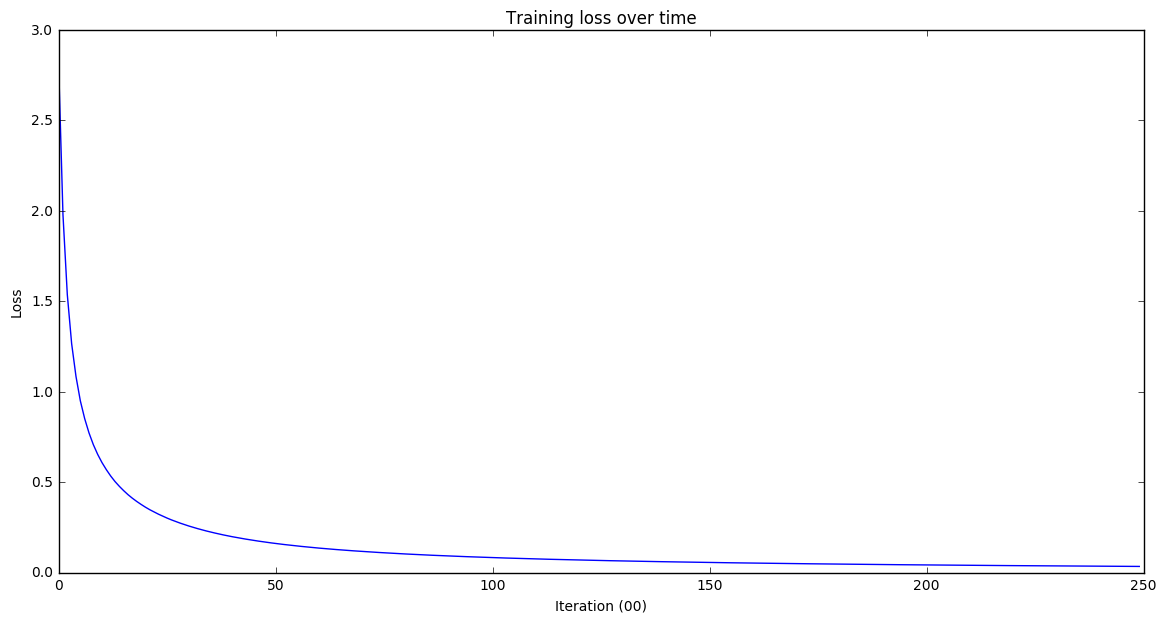

In [14]:
#
# Plot the moving average of loss with a window of 250 iterations
#
means = [np.mean(loss[(i*100):(i*100)+100]) for i in range(0,np.int(len(loss)/100))]
mavg = [np.mean(means[i-min(i,250):i]) for i in range(1,len(means)+1)]
plt.title("Training loss over time")
plt.plot(mavg)
plt.xlabel("Iteration (00)")
plt.ylabel("Loss")
plt.show()

In [19]:
#
# Compute our accuracy by counting the number
# of times we got a forecast correct, divided by the total
# number of forecasts.  We use a random sample of the
# test data, assuming 1000 as a rule of thumb.
#
# We calculate an "accurate" forecast by counting the number
# of times our predicted index minus the correct index is 0.
#
def accuracy(sess, model, X=xtest_1, y=ytest_1, size=1000):
    x_batch, y_batch = random_batch(X, y, size)
    d = {model['X']: x_batch, model['y']: y_batch}
    preds = sess.run(tf.argmax(model['logits'], 1), feed_dict=d)
    answer = np.array([np.argmax(z) for z in np.array(y_batch)])
    return ((preds-answer == 0).sum())/(size*1.0)

print("We have achieved an accuracy of %f%% with minimal loss of %f over %d iterations" % 
      ((accuracy(sess,model,size=5000)*100.0), np.min(loss), len(loss)))
    

We have achieved an accuracy of 99.060000% with minimal loss of 0.000000 over 25001 iterations


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

We started our Adam optimizer with an initial learning rate of 0.00025.  We ran 25,000 training epochs.  In each
epoch we chose 100 random X,y pairs from the training data as our training set.  

The cross validation errors
(e.g. a measure of how far off our predictions were from the desired one-hot label) for the 100 were then used
by Adam to tweak weights.  The sizes and number of filters for each convolution were described earlier.  

We used
a simple RELU activation layer (x if x>0) between all processing layers.  We did not use a RELU layer on the last
linear layer.  This allowed us to see how far off we were from "0" or "1" in the one-hot array, then appropriately
update weights during backpropagation.  Had we added a RELU layer (like I did in an earlier attempt), we'd
be destroying valuable information for the gradient descent.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

My approach was inspired by the convolutional networks of the Atari game agent in the classic paper for Deep Q learning.  The first layer
will eventually look for edges, with the second layer looking for 
patterns of edges. The next layer looks for linear combinations of these
patterns to produce 512 features.  The final layer combines these features
to indicate which of the n_classes (43) labels is closest to our desired outcome.

I retained all color channels, applied two convolutions, then tapered the network twice using
fully connected neural networks.  The last network was then wired into 43 individual values, creating a "classifier"
network.  

I tried various numbers of filters for the first two convolutions, trying [8,16,32,64] in succession.
Two 64-deep convolutions did the trick.  That achieved 98.8%.  I wanted 99.  For this, I added another fully
connected layer before the logits.  That did it!

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

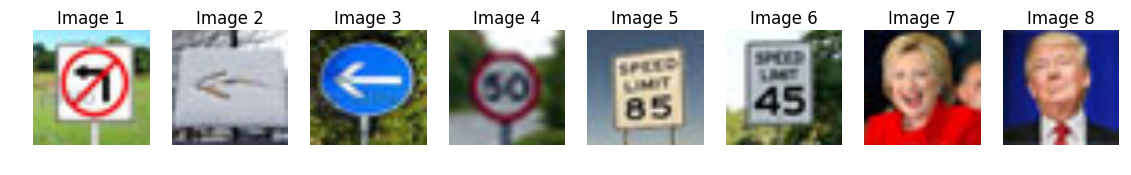

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# These images were taken from a Google search, then manually clipped
# and reduced to a 32x32 image in Photoshop.

def load_test_images():
    return [cv2.cvtColor(cv2.imread('images/t%d.jpg' % i), cv2.COLOR_BGR2RGB) for i in range(1,9)]

def show_images():
    images = load_test_images()
    for i in range(1,9):
        plt.subplot(1,8,i)
        plt.imshow(images[i-1])
        plt.title("Image %d" % i)
        plt.axis('off')
    plt.show()
    
show_images()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

The network was trained on fixed 32x32 images that were clipped from larger scenes.  We need a method for processing larger scenes.  For now, I used Photoshop and extracted the images manually.  A naive approach would pass the network over a larger image, much like we do in a convolutional layer or a GPS shader, then retain the top-ranked image sections and their 32x32 region.

I'm also deeply curious what this AI thinks of our US Presidential candidates.

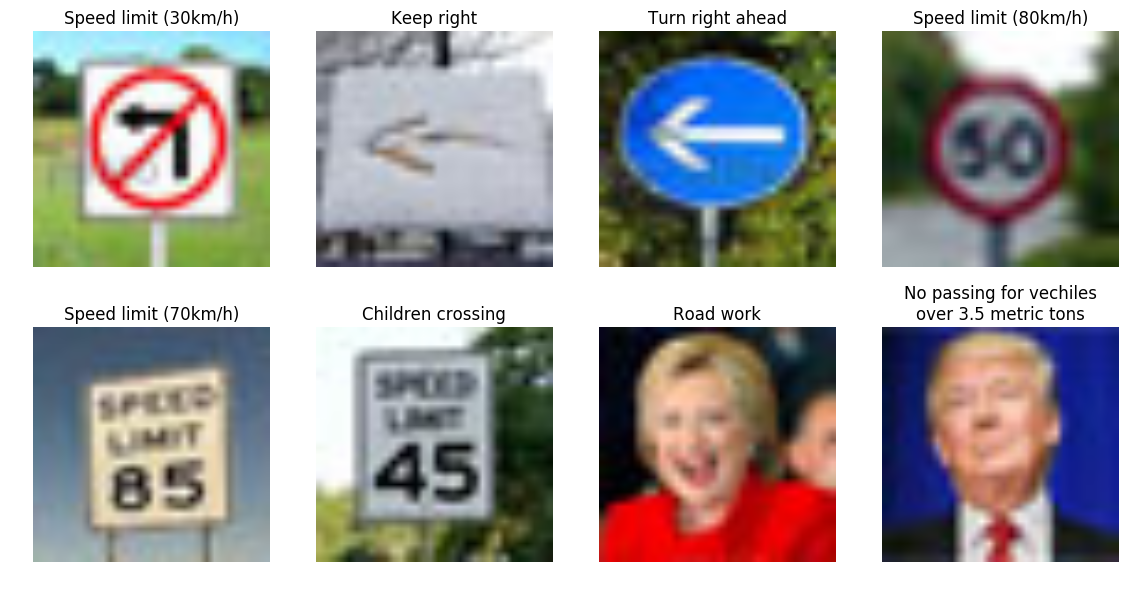

In [21]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import pandas as pd
from textwrap import wrap

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    sf = np.exp(x)
    sf = sf/np.sum(sf, axis=0)
    return sf

def top_predictions(logits, n=4):
    """Return an array pairs of [prediction, percentage] for the top n predictions in a set of logits"""
    sf = softmax(logits)
    return [[a, sf[a]] for a in np.argsort(sf)[::-1][0:n]]

def logits_for_images(sess, images):
    X = [normalize_image(clarify_image(img)) for img in images]
    y = [np.eye(43)[1] for img in images]
    d = {model['X']: X, model['y']: y}
    return sess.run(model['logits'], feed_dict=d)

def describe_images():
    names = np.array(pd.read_csv("./signnames.csv")['SignName'])
    images = load_test_images()
    logits = logits_for_images(sess, images)
    preds = names[[np.argmax(log) for log in logits]]
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i])
        plt.title("\n".join(wrap(preds[i], 25)))
        plt.axis('off')
    plt.show()
        
describe_images()

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

Sadly, no.  However, the AI realized that Hillary Clinton means more road work and Trump inspires heavy vehicles.

This algorithm was spoonfed pictures of signs from Europe.  A self-driving car will need models that correlate
well with local signage, and likely local weather patterns for
environmental noise. I'd like to learn more how a network trainied on
a smaller sample image is indeed scaled to full scenes.

In [22]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    sf = np.exp(x)
    sf = sf/np.sum(sf, axis=0)
    return sf

def top_predictions(logits, n=5):
    """Return an array pairs of [prediction, percentage] for the top n predictions in a set of logits"""
    sf = softmax(logits)
    return [[a, sf[a]] for a in np.argsort(sf)[::-1][0:n]]

def visualize_softmax():
    names = np.array(pd.read_csv("./signnames.csv")['SignName'])
    images = load_test_images()
    logits = logits_for_images(sess, images)
    tops = np.array([top_predictions(log) for log in logits])
    for i in range(0,8):
        print("Image",i+1)
        scores = tops[i]
        for s in scores:
            label, pct = s
            print("%.3f%% "%(pct*100), names[int(label)])
        print("  ")
        
visualize_softmax()


Image 1
80.064%  Speed limit (30km/h)
17.466%  Stop
2.288%  Speed limit (70km/h)
0.182%  Speed limit (20km/h)
0.000%  Dangerous curve to the right
  
Image 2
92.897%  Keep right
6.445%  Roundabout mandatory
0.555%  Slippery road
0.101%  Priority road
0.000%  Traffic signals
  
Image 3
100.000%  Turn right ahead
0.000%  Keep right
0.000%  Ahead only
0.000%  Turn left ahead
0.000%  Keep left
  
Image 4
100.000%  Speed limit (80km/h)
0.000%  Wild animals crossing
0.000%  Speed limit (50km/h)
0.000%  Speed limit (100km/h)
0.000%  Speed limit (60km/h)
  
Image 5
98.832%  Speed limit (70km/h)
1.160%  Speed limit (20km/h)
0.008%  Stop
0.000%  No entry
0.000%  Speed limit (120km/h)
  
Image 6
99.830%  Children crossing
0.167%  Roundabout mandatory
0.002%  Priority road
0.000%  End of all speed and passing limits
0.000%  Dangerous curve to the right
  
Image 7
97.315%  Road work
2.330%  Bicycles crossing
0.355%  Speed limit (30km/h)
0.000%  Yield
0.000%  Double curve
  
Image 8
99.976%  No pass

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

The model is confidantly ignorant.  I know some people like that, do you?

Two of the eight images are European signs.  Interestingly, the model 
claims 100% confidence in "turn right ahead," when the sign is the mirror
image, a clear "turn left ahead."  The speed limit of 50kph is hard
to distinguish, with the model claiming its 80kph with 50kph a distant third.

The snow covered, human drawn arrow to the left is also recognized as
"keep right," the mirror of what we want.  These are labels 38 and 39,
which have fewer than a hundred samples.  That could explain it, too.
More examples could help!

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


In [23]:
def classify_image(filename):
    """Return an array of predictions and their confidence for an image filename"""
    names = np.array(pd.read_csv("./signnames.csv")['SignName'])
    image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    X = [normalize_image(clarify_image(image))]
    y = [np.eye(43)[1]]
    d = {model['X']: X, model['y']: y}
    logits = sess.run(model['logits'], feed_dict=d)[0]
    top = top_predictions(logits)
    return [[names[int(label)], pct] for label, pct in top]

for ans in classify_image("images/t1.jpg"):
    print(ans)
    
    

['Speed limit (30km/h)', 0.80064338]
['Stop', 0.17465717]
['Speed limit (70km/h)', 0.022878246]
['Speed limit (20km/h)', 0.0018212274]
['Dangerous curve to the right', 9.6749497e-09]


**Answer:**

I've provided a *classify_image* function that returns an array
of predictions with their level of confidence. The ML 
pipeline has five steps:

1. Ingest the image using the cvision library, converting it to RGB colors
2. Apply filters to normalize the image into floating point values, creating a 32x32x3 tensor.
3. Feed a one-element array containing the 32x32x3 tensor and a dummy one-hot label into our network.  Evaluate a forward pass.
4. Extract the logits from tensorflow, apply softmax, get a sorted
array of [label, softmax]
5. Convert the predicted labels into a human readable string and the
softmax into a percentage, then return a sorted array of [human label, confidence percentage] pairs.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.